### 1. Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

### 2. Load the dataset

In [2]:
df = pd.read_csv("monthly_sales.csv")

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

ts = df['Sales']

### Time Series Decomposition

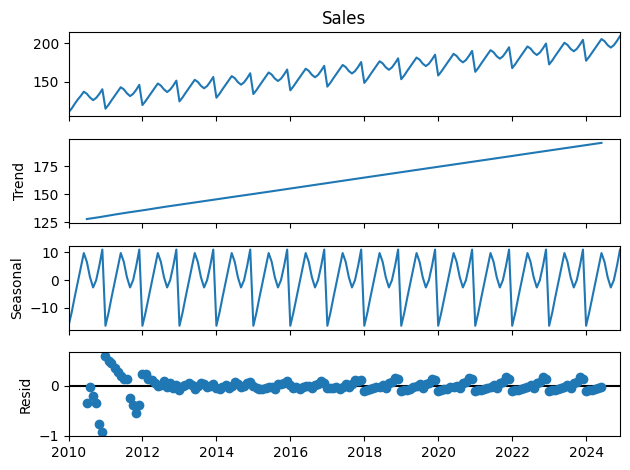

INTERPRETATION:
Trend shows long-term increase in sales
Seasonality repeats every year
Residuals show random noise



In [3]:
decomposition = seasonal_decompose(ts, model='additive', period=12)

decomposition.plot()
plt.show()

print("INTERPRETATION:")
print("Trend shows long-term increase in sales")
print("Seasonality repeats every year")
print("Residuals show random noise\n")

### Stationarity Tests

In [4]:
# ADF Test
adf_result = adfuller(ts)
print("ADF TEST")
print("Test Statistic:", adf_result[0])
print("p-value:", adf_result[1])

if adf_result[1] < 0.05:
    print("Series is stationary\n")
else:
    print("Series is non-stationary\n")

ADF TEST
Test Statistic: -2.1814779605672316
p-value: 0.21303643252379
Series is non-stationary



In [5]:
# KPSS Test
kpss_result = kpss(ts, regression='c')
print("KPSS TEST")
print("Test Statistic:", kpss_result[0])
print("p-value:", kpss_result[1])

if kpss_result[1] < 0.05:
    print("Series is non-stationary\n")
else:
    print("Series is stationary\n")

print("Final Conclusion: Time series is non-stationary\n")

KPSS TEST
Test Statistic: 2.1074417554948215
p-value: 0.01
Series is non-stationary

Final Conclusion: Time series is non-stationary



### Linear Regression Forecasting

RMSE: 5.504832795197232


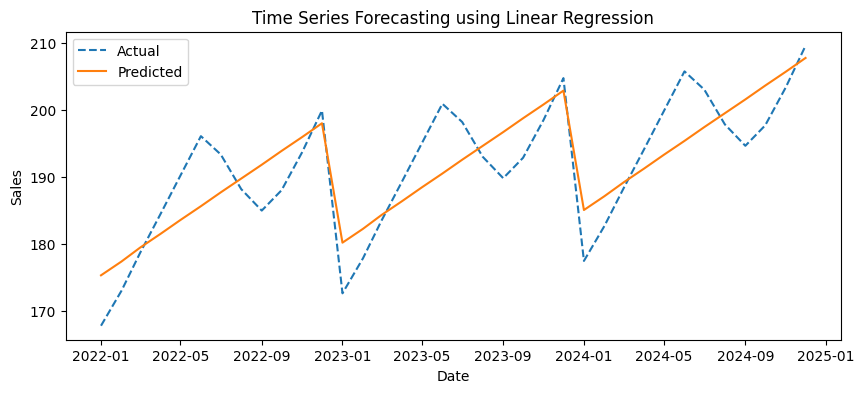

In [6]:
df['Time_Index'] = range(len(df))
df['Month'] = df.index.month

X = df[['Time_Index', 'Month']]
y = df['Sales']

split = int(len(df) * 0.8)

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("RMSE:", rmse)

plt.figure(figsize=(10,4))
plt.plot(y_test.index, y_test, label="Actual", linestyle="--")
plt.plot(y_test.index, y_pred, label="Predicted")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Time Series Forecasting using Linear Regression")
plt.legend()
plt.show()